In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler


In [1]:
import tensorflow as tf
print(tf.__version__)
print("GPU 可用:", tf.config.list_physical_devices('GPU'))

2.10.0
GPU 可用: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
LDAP = pd.read_csv("./Data/03-11/5percent_LDAP.csv")
LDAP = LDAP.sample(n=25000, random_state=1)
syn = pd.read_csv("./Data/03-11/5percent_Syn.csv")
syn = syn.sample(n=25000, random_state=1)
udp = pd.read_csv("./Data/03-11/5percent_UDP.csv")
udp = udp.sample(n=25000, random_state=1)
net = pd.read_csv("./Data/03-11/5percent_NetBIOS.csv")
net = net.sample(n=25000, random_state=1)
sql = pd.read_csv("./Data/03-11/5percent_MSSQL.csv")
sql = sql.sample(n=25000, random_state=1)
port = pd.read_csv("./Data/03-11/5percent_Portmap.csv")
lag = pd.read_csv("./Data/03-11/5percent_UDPLag.csv")
lag = lag.sample(n=25000, random_state=1)


C:\Users\yzy\AppData\Local\Temp\ipykernel_3420\3191391993.py:1: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  LDAP = pd.read_csv("./Data/03-11/5percent_LDAP.csv")
C:\Users\yzy\AppData\Local\Temp\ipykernel_3420\3191391993.py:3: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  syn = pd.read_csv("./Data/03-11/5percent_Syn.csv")
C:\Users\yzy\AppData\Local\Temp\ipykernel_3420\3191391993.py:5: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  udp = pd.read_csv("./Data/03-11/5percent_UDP.csv")
C:\Users\yzy\AppData\Local\Temp\ipykernel_3420\3191391993.py:7: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  net = pd.read_csv("./Data/03-11/5percent_NetBIOS.csv")
C:\Users\yzy\AppData\Local\Temp\ipykernel_3420\3191391993.py:9: DtypeWarning: Columns (86) have mixed types. Specify dtype

In [4]:
#数据融合
df = pd.concat([LDAP, syn , udp, net, sql, port, lag])

In [6]:
df.to_csv('./Data/CICDDOS2019_marge', index=False)

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
75981,703114,3590,172.16.0.5-192.168.50.4-793-46970-17,172.16.0.5,793,192.168.50.4,46970,17,2018-11-03 10:23:57.221112,1,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,LDAP
15333,1310187,20631,172.16.0.5-192.168.50.4-840-9494-17,172.16.0.5,840,192.168.50.4,9494,17,2018-11-03 10:26:29.185340,1,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,LDAP
43876,648520,10571,172.16.0.5-192.168.50.4-979-46731-17,172.16.0.5,979,192.168.50.4,46731,17,2018-11-03 10:23:43.767584,1,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,LDAP
7915,188359,63012,172.16.0.5-192.168.50.4-931-12316-17,172.16.0.5,931,192.168.50.4,12316,17,2018-11-03 10:09:24.092387,48,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,NetBIOS
1463,1654293,13939,172.16.0.5-192.168.50.4-852-38265-17,172.16.0.5,852,192.168.50.4,38265,17,2018-11-03 10:27:55.533189,1,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,LDAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25803,446650,49477,172.16.0.5-192.168.50.4-26696-35591-6,172.16.0.5,26696,192.168.50.4,35591,6,2018-11-03 11:29:53.776637,104,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,Syn
30396,450193,161636,172.16.0.5-192.168.50.4-30165-58186-6,172.16.0.5,30165,192.168.50.4,58186,6,2018-11-03 11:29:54.181772,0,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,Syn
30069,312401,104876,172.16.0.5-192.168.50.4-28245-45535-6,172.16.0.5,28245,192.168.50.4,45535,6,2018-11-03 11:29:36.506295,101,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,Syn
8756,140528,58931,172.16.0.5-192.168.50.4-26911-26911-6,172.16.0.5,26911,192.168.50.4,26911,6,2018-11-03 11:29:19.422060,65441528,...,45.085474,100.0,1.0,13088259.2,4.113759e+06,17959725.0,7786858.0,0,1,Syn


In [7]:
# 计算每个标签的出现次数
label_counts = df['Label'].value_counts()

# 计算占比
label_proportions = label_counts / len(df)

# 打印结果
print(label_proportions)

Syn        0.286437
UDP        0.179697
NetBIOS    0.171194
MSSQL      0.157565
LDAP       0.141887
Portmap    0.058596
BENIGN     0.004217
UDPLag     0.000407
Name: Label, dtype: float64


In [8]:
# 使用drop_duplicates()方法删除重复值
df = df.drop_duplicates()

In [9]:
# 删除空值和无穷大值
df.replace([np.inf, -np.inf], np.nan, inplace= True)

In [10]:
# 统计每个特征中的空值
null_counts = df.isnull().sum()
print(null_counts)

Unnamed: 0.1    0
Unnamed: 0      0
Flow ID         0
Source IP       0
Source Port     0
               ..
Idle Max        0
Idle Min        0
SimillarHTTP    0
Inbound         0
Label           0
Length: 89, dtype: int64


In [11]:
# 指定要删除的列
columns_to_drop = [ 'Flow ID', 'Source IP', 'Destination IP', 'Timestamp','SimillarHTTP']

# 使用 drop 方法删除列
df = df.drop(columns=columns_to_drop, errors='ignore')
df


,Unnamed: 0.1,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
75981,703114,3590,793,46970,17,1,2,0,2944.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,LDAP
15333,1310187,20631,840,9494,17,1,2,0,2944.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,LDAP
43876,648520,10571,979,46731,17,1,2,0,2944.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,LDAP
7915,188359,63012,931,12316,17,48,2,0,458.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,NetBIOS
1463,1654293,13939,852,38265,17,1,2,0,2944.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,LDAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25803,446650,49477,26696,35591,6,104,2,2,12.0,12.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,Syn
30396,450193,161636,30165,58186,6,0,2,0,12.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,Syn
30069,312401,104876,28245,45535,6,101,2,2,12.0,12.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,Syn
8756,140528,58931,26911,26911,6,65441528,12,4,72.0,24.0,...,46.2,45.085474,100.0,1.0,13088259.2,4.113759e+06,17959725.0,7786858.0,1,Syn


In [12]:
df['Label'].value_counts()

Syn        45711
UDP        28677
NetBIOS    27320
MSSQL      25145
LDAP       22643
Portmap     9351
BENIGN       673
UDPLag        65
Name: Label, dtype: int64

In [13]:
df = df.dropna()
# 删除空值

### 删除无用特征

In [15]:
df_std = pd.DataFrame(df.std(), columns = ['value'])  #计算了df01数据框每一列的标准化值,赋予新数据框，列名为value
unchange_col = df_std[df_std['value'] == 0].index      #找df_std数据框中'value'列中所有值为0的行，将这些行的索引存储在unchange_col变量中
unchange_col

C:\Users\yzy\AppData\Local\Temp\ipykernel_3420\3282077520.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = pd.DataFrame(df.std(), columns = ['value'])  #计算了df01数据框每一列的标准化值,赋予新数据框，列名为value


Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count',
       'PSH Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [16]:
df = df.drop(unchange_col, axis=1)    #删除在unchange_col变量中存储的索引对应的行。
df

,Unnamed: 0.1,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
75981,703114,3590,793,46970,17,1,2,0,2944.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,LDAP
15333,1310187,20631,840,9494,17,1,2,0,2944.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,LDAP
43876,648520,10571,979,46731,17,1,2,0,2944.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,LDAP
7915,188359,63012,931,12316,17,48,2,0,458.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,NetBIOS
1463,1654293,13939,852,38265,17,1,2,0,2944.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,LDAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24810,701905,608028,15251,25964,6,1,2,0,12.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,Syn
25803,446650,49477,26696,35591,6,104,2,2,12.0,12.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,Syn
30069,312401,104876,28245,45535,6,101,2,2,12.0,12.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,Syn
8756,140528,58931,26911,26911,6,65441528,12,4,72.0,24.0,...,46.2,45.085474,100.0,1.0,13088259.2,4.113759e+06,17959725.0,7786858.0,1,Syn


In [17]:
### 检查非数值类型
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

print("非数值型字段包括：", non_numeric_columns)

非数值型字段包括： Index(['Label'], dtype='object')


### 编码

In [18]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 是 sklearn.preprocessing 模块中的一个工具，用于将类别变量转化为数值。
# 首先创建了一个 LabelEncoder 对象 le，然后使用 fit_transform 方法将 df02['Label'] 中的类别值转化为数值。
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])   
df['Label']

75981    1
15333    1
43876    1
7915     3
1463     1
        ..
24810    5
25803    5
30069    5
8756     5
11511    5
Name: Label, Length: 152727, dtype: int32

In [19]:
df.to_csv('./Data/CICIDOS2019_seclect_72.csv', index=False)

In [20]:
df['Label'].value_counts()

5    42329
6    28167
3    26285
2    24241
1    22146
4     8829
0      665
7       65
Name: Label, dtype: int64

### 欠采样

C:\Users\yzy\AppData\Local\Temp\ipykernel_28088\1806034403.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['Cluster'] = cluster_labels


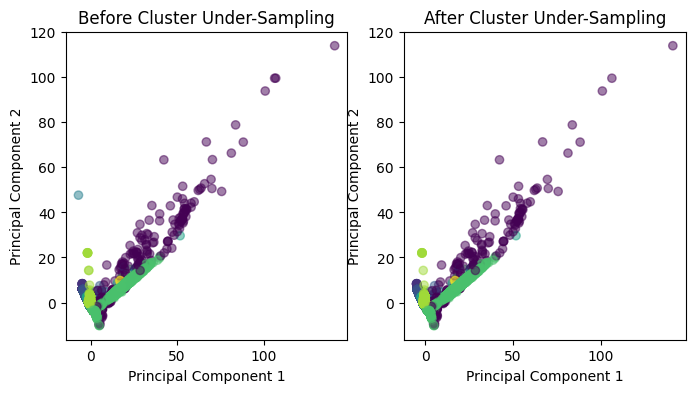

5    30199
6    29952
3    27618
2    26681
1    22468
4     5956
0      637
7       68
Name: Label, dtype: int64


In [ ]:
from sklearn.cluster import MiniBatchKMeans
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 要进行欠采样的类别
categories_to_downsample = [5]

# 目标样本数量
target_sample_count = 30000

# 过采样前进行PCA降维以便可视化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Label', axis=1))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制欠采样前的散点图
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Label'], alpha=0.5)
plt.title('Before Cluster Under-Sampling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 对每个类别进行聚类欠采样
for category in categories_to_downsample:
    category_df = df[df['Label'] == category]

    if len(category_df) > target_sample_count:
        # 应用MiniBatchKMeans算法进行聚类
        minibatch_kmeans = MiniBatchKMeans(n_clusters=target_sample_count, n_init=10, random_state=42)
        cluster_labels = minibatch_kmeans.fit_predict(category_df.drop('Label', axis=1))
        category_df['Cluster'] = cluster_labels

        # 选择每个簇的一个样本
        sampled_indices = category_df.groupby('Cluster').apply(lambda x: x.sample(1)).index.get_level_values(1)
        df = df.drop(df[(df['Label'] == category) & (~df.index.isin(sampled_indices))].index)

# 欠采样后进行PCA降维以便可视化
X_scaled_downsampled = scaler.transform(df.drop('Label', axis=1))
X_pca_downsampled = pca.transform(X_scaled_downsampled)

# 绘制欠采样后的散点图
plt.subplot(1, 2, 2)
plt.scatter(X_pca_downsampled[:, 0], X_pca_downsampled[:, 1], c=df['Label'], alpha=0.5)
plt.title('After Cluster Under-Sampling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# 显示欠采样后的类别计数
print(df['Label'].value_counts())


### 过采样

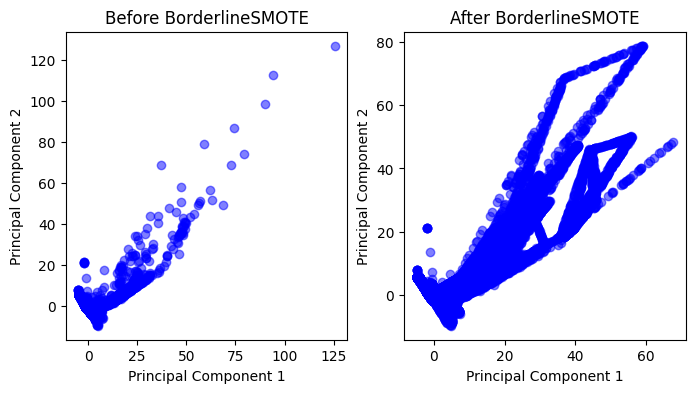

5    30199
6    29952
7    29932
0    29363
3    27618
2    26681
4    24044
1    22468
Name: Label, dtype: int64


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 要进行过采样的类别
categories_to_oversample = [4, 0, 7]

# 目标样本数量
target_sample_count = 30000

# 初始化BorderlineSMOTE实例
smote = BorderlineSMOTE()

# 过采样前进行PCA降维以便可视化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Label', axis=1))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制过采样前的散点图
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', alpha=0.5)
plt.title('Before BorderlineSMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 选取一部分非过采样类别的样本以确保至少有两个类别
df_minority_classes = df[df['Label'].isin(categories_to_oversample)]
df_majority_sample = df[~df['Label'].isin(categories_to_oversample)].sample(n=10000)  # 取样10000个样本

# 进行过采样
oversampled_data = pd.DataFrame(columns=df.columns)  # 创建一个新的DataFrame来保存过采样的数据
for category in categories_to_oversample:
    # 提取目标类别的数据
    category_df = df[df['Label'] == category]
    
    # 如果类别的样本数已经达到或超过目标样本数，直接使用原始数据
    if len(category_df) >= target_sample_count:
        oversampled_data = pd.concat([oversampled_data, category_df], axis=0)
        continue

    # 计算需要生成的样本数
    n_samples_to_generate = target_sample_count - len(category_df)
    
    # 仅对目标类别进行过采样
    smote = BorderlineSMOTE(sampling_strategy={category: target_sample_count})
    X_resampled, y_resampled = smote.fit_resample(df.drop('Label', axis=1), df['Label'])
    
    # 找到新生成的样本并添加到oversampled_data
    resampled_category_df = pd.DataFrame(X_resampled[len(df):], columns=df.columns.drop('Label'))
    resampled_category_df['Label'] = y_resampled[len(df):]
    oversampled_data = pd.concat([oversampled_data, resampled_category_df], axis=0)

# 将未过采样的其他类别数据添加到结果DataFrame中
df_remaining = df[~df['Label'].isin(categories_to_oversample)]
df = pd.concat([oversampled_data, df_remaining], axis=0).reset_index(drop=True)

# 过采样后进行PCA降维以便可视化
X_scaled_resampled = scaler.transform(df.drop('Label', axis=1))
X_pca_resampled = pca.transform(X_scaled_resampled)

# 绘制过采样后的散点图
plt.subplot(1, 2, 2)
plt.scatter(X_pca_resampled[:, 0], X_pca_resampled[:, 1], color='blue', alpha=0.5)
plt.title('After BorderlineSMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.savefig('./picture/guocaiyang.png')
plt.show()

# 显示过采样后的类别计数
print(df['Label'].value_counts())


In [212]:
df['Label'].value_counts()

5    30199
6    29952
7    29932
0    29363
3    27618
2    26681
4    24044
1    22468
Name: Label, dtype: int64

In [ ]:
import pandas as pd
df02 = df.copy()
df02 = df02.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtype == 'object' else col)

In [230]:
df02

,Unnamed: 0.1,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,42237,20625,709,23454,17,1,2,0,458.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
1,78415,20520,793,35789,17,1,2,0,494.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
2,104140,190294,712,21344,17,1,2,0,422.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
3,113835,92325,895,51783,17,1,2,0,458.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
4,57410,99572,648,52824,17,48,2,0,458.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220252,318791,238369,34219,48349,6,116,2,2,12.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5
220253,620523,401963,61272,36971,6,158,2,2,12.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5
220254,12028,110759,35352,9698,17,989457,20,0,7242.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6
220255,86678,82330,51481,55083,17,2,2,0,766.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6


In [215]:
# 指定要保留的列名
columns_to_keep = [
    'Unnamed: 0', 'Source Port', 'Protocol', 'Total Length of Fwd Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean',
    'Fwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packets/s',
    'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'ACK Flag Count',
    'Average Packet Size', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes',
    'Init_Win_bytes_forward', 'Label'
]

# 用这个列表来过滤 df02 数据集
df02 = df02[columns_to_keep]
df02

,Unnamed: 0,Source Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,ACK Flag Count,Average Packet Size,Avg Fwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Label
0,20625,709,17,458.0,229.0,229.0,229.0,0.000000,4.580000e+08,2.000000e+06,2.000000e+06,229.0,229.0,229.000000,0,343.50,229.0,458,-1,4
1,20520,793,17,494.0,247.0,247.0,247.0,0.000000,4.940000e+08,2.000000e+06,2.000000e+06,247.0,247.0,247.000000,0,370.50,247.0,494,-1,4
2,190294,712,17,422.0,211.0,211.0,211.0,0.000000,4.220000e+08,2.000000e+06,2.000000e+06,211.0,211.0,211.000000,0,316.50,211.0,422,-1,4
3,92325,895,17,458.0,229.0,229.0,229.0,0.000000,4.580000e+08,2.000000e+06,2.000000e+06,229.0,229.0,229.000000,0,343.50,229.0,458,-1,4
4,99572,648,17,458.0,229.0,229.0,229.0,0.000000,9.541667e+06,4.166667e+04,4.166667e+04,229.0,229.0,229.000000,0,343.50,229.0,458,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220252,238369,34219,6,12.0,6.0,6.0,6.0,0.000000,2.068966e+05,3.448276e+04,1.724138e+04,6.0,6.0,6.000000,1,7.50,6.0,12,5840,5
220253,401963,61272,6,12.0,6.0,6.0,6.0,0.000000,1.518987e+05,2.531646e+04,1.265823e+04,6.0,6.0,6.000000,1,7.50,6.0,12,5840,5
220254,110759,35352,17,7242.0,401.0,321.0,362.1,30.127623,7.319166e+03,2.021311e+01,2.021311e+01,321.0,401.0,360.142857,0,378.15,362.1,7242,-1,6
220255,82330,51481,17,766.0,383.0,383.0,383.0,0.000000,3.830000e+08,1.000000e+06,1.000000e+06,383.0,383.0,383.000000,0,574.50,383.0,766,-1,6


In [ ]:
import pandas as pd
df03 = df.copy()
df03 = df03.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtype == 'object' else col)

In [227]:
# 指定要保留的列名
columns_to_drop = [
    'Unnamed: 0', 'Source Port', 'Protocol', 'Total Length of Fwd Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean',
    'Fwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packets/s',
    'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'ACK Flag Count',
    'Average Packet Size', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes',
    'Init_Win_bytes_forward'
]

# 用这个列表来过滤 df02 数据集
df03 = df03.drop(columns=columns_to_drop, errors='ignore')
df03

,Unnamed: 0.1,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Bwd Packets,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,42237,23454,1,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
1,78415,35789,1,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
2,104140,21344,1,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
3,113835,51783,1,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
4,57410,52824,48,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220252,318791,48349,116,2,2,12.0,6.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5
220253,620523,36971,158,2,2,12.0,6.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5
220254,12028,9698,989457,20,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6
220255,86678,55083,2,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6


In [231]:
df04= df.copy()
df_std = pd.DataFrame(df04.std(), columns = ['value'])  #计算了df01数据框每一列的标准化值,赋予新数据框，列名为value
unchange_col = df_std[df_std['value'] == 0].index      #找df_std数据框中'value'列中所有值为0的行，将这些行的索引存储在unchange_col变量中
df04 = df04.drop(columns=unchange_col, errors='ignore')
df04

,Unnamed: 0.1,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,42237,20625,709,23454,17,1,2,0,458.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
1,78415,20520,793,35789,17,1,2,0,494.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
2,104140,190294,712,21344,17,1,2,0,422.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
3,113835,92325,895,51783,17,1,2,0,458.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
4,57410,99572,648,52824,17,48,2,0,458.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220252,318791,238369,34219,48349,6,116,2,2,12.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5
220253,620523,401963,61272,36971,6,158,2,2,12.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5
220254,12028,110759,35352,9698,17,989457,20,0,7242.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6
220255,86678,82330,51481,55083,17,2,2,0,766.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6


In [232]:
df04.to_csv('./Data/CICIDOS2019_seclect_pingheng_72.csv', index=False)